In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pycaret
from pycaret.datasets import get_data


train_df = pd.read_csv('../Resources/train_u6lujuX_CVtuZ9i.csv')
test_df = pd.read_csv('../Resources/test_Y3wMUE5_7gLdaTN.csv')


In [57]:
y_train = train_df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)
X_train = train_df.drop(columns=['Loan_Status', 'Loan_ID'])


In [58]:
numerical_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [59]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']),
        ('cat', categorical_transformer, ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])
    ])

model = RandomForestClassifier(n_estimators=100, random_state=0)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])


In [60]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=0)

pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_valid)

print(classification_report(y_valid, preds))
print(f"Accuracy: {accuracy_score(y_valid, preds)}")

X_test = test_df.drop(columns=['Loan_ID'])
final_predictions = pipeline.predict(X_test)

test_df['Loan_Status_Predicted'] = final_predictions
test_df.to_csv('predictions.csv', index=False)


              precision    recall  f1-score   support

           0       0.67      0.42      0.52        33
           1       0.81      0.92      0.86        90

    accuracy                           0.79       123
   macro avg       0.74      0.67      0.69       123
weighted avg       0.77      0.79      0.77       123

Accuracy: 0.7886178861788617


In [61]:
final_predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [62]:
fp = pd.read_csv('./predictions.csv')
fp['Loan_Status_Predicted'] = fp['Loan_Status_Predicted'].replace({1: 'Y', 0: 'N'})
fp


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Predicted
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,N


In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin

# Load your dataset
df = pd.read_csv('./predictions.csv')
df.drop(columns=['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], inplace=True)


target_column = 'Loan_Status_Predicted'

class DependentsTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['Dependents'] = X_copy['Dependents'].replace('3+', 3).astype(float)
        return X_copy
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']
categorical_features = []

# Preprocessing for numerical data: imputation + scaling
numerical_transformer = Pipeline(steps=[
    ('dependents_transformer', DependentsTransformer()),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data: imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

# Define the model
model = RandomForestClassifier(random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# Split data into train and test sets correctly
X = df.drop(target_column, axis=1)  
y = df[target_column]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocess the data and train the model
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
print("Model accuracy: ", accuracy_score(y_test, y_pred))


Model accuracy:  0.972972972972973


In [64]:
df['Loan_Status_Predicted'].value_counts()

1    290
0     77
Name: Loan_Status_Predicted, dtype: int64

In [65]:
import pycaret
pycaret.__version__
from pycaret.classification import *

av = pd.read_csv('../preprocessed_train_data.csv')


In [66]:
av

,Gender,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849.0,121.0,360.0,1.0,Y,1,0,0,0,0,0,1
1,0,1,1,0,6091.0,128.0,360.0,1.0,N,0,1,0,0,1,0,0
2,0,1,1,1,3000.0,66.0,360.0,1.0,Y,1,0,0,0,0,0,1
3,0,1,0,0,4941.0,120.0,360.0,1.0,Y,1,0,0,0,0,0,1
4,0,0,1,0,6000.0,141.0,360.0,1.0,Y,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,0,1,0,2900.0,71.0,360.0,1.0,Y,1,0,0,0,1,0,0
594,0,1,1,0,4106.0,40.0,180.0,1.0,Y,0,0,0,1,1,0,0
595,0,1,1,0,8312.0,253.0,360.0,1.0,Y,0,1,0,0,0,0,1
596,0,1,1,0,7583.0,187.0,360.0,1.0,Y,0,0,1,0,0,0,1


In [67]:
clf1 = setup(data = av, target = 'Loan_Status')

,Description,Value
0,Session id,779
1,Target,Loan_Status
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(598, 16)"
5,Transformed data shape,"(598, 16)"
6,Transformed train set shape,"(418, 16)"
7,Transformed test set shape,"(180, 16)"
8,Numeric features,15
9,Preprocess,True


In [68]:
clf1 = setup(data=av, target='Loan_Status')


,Description,Value
0,Session id,475
1,Target,Loan_Status
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(598, 16)"
5,Transformed data shape,"(598, 16)"
6,Transformed train set shape,"(418, 16)"
7,Transformed test set shape,"(180, 16)"
8,Numeric features,15
9,Preprocess,True


In [69]:
best_model = compare_models()


In [70]:
model = create_model('lr')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.6950,0.6975,0.2696,0.2779
1,0.8095,0.0000,0.8095,0.8507,0.7787,0.4633,0.5490
2,0.8333,0.0000,0.8333,0.8395,0.8201,0.5638,0.5933
3,0.7143,0.0000,0.7143,0.6896,0.6681,0.1949,0.2310
4,0.7381,0.0000,0.7381,0.7409,0.6864,0.2426,0.3091
5,0.8571,0.0000,0.8571,0.8816,0.8424,0.6170,0.6679
6,0.7619,0.0000,0.7619,0.7701,0.7234,0.3291,0.3900
7,0.8095,0.0000,0.8095,0.8083,0.8000,0.5385,0.5534
8,0.8293,0.0000,0.8293,0.8362,0.8159,0.5605,0.5903


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [71]:
tuned_model = tune_model(model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7381,0.0000,0.7381,0.7215,0.7173,0.3145,0.3310
1,0.8095,0.0000,0.8095,0.8507,0.7787,0.4633,0.5490
2,0.8571,0.0000,0.8571,0.8610,0.8488,0.6348,0.6545
3,0.7143,0.0000,0.7143,0.6896,0.6681,0.1949,0.2310
4,0.7381,0.0000,0.7381,0.7409,0.6864,0.2426,0.3091
5,0.8571,0.0000,0.8571,0.8816,0.8424,0.6170,0.6679
6,0.7619,0.0000,0.7619,0.7701,0.7234,0.3291,0.3900
7,0.8095,0.0000,0.8095,0.8083,0.8000,0.5385,0.5534
8,0.8293,0.0000,0.8293,0.8362,0.8159,0.5605,0.5903


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


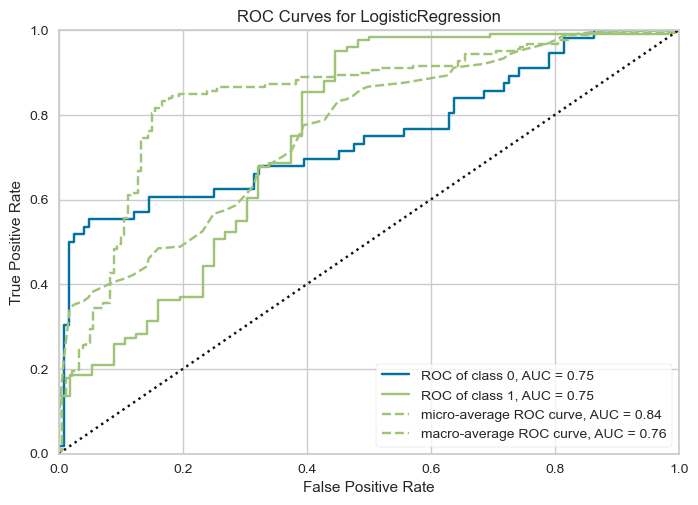

In [72]:
plot_model(tuned_model, plot = 'auc')


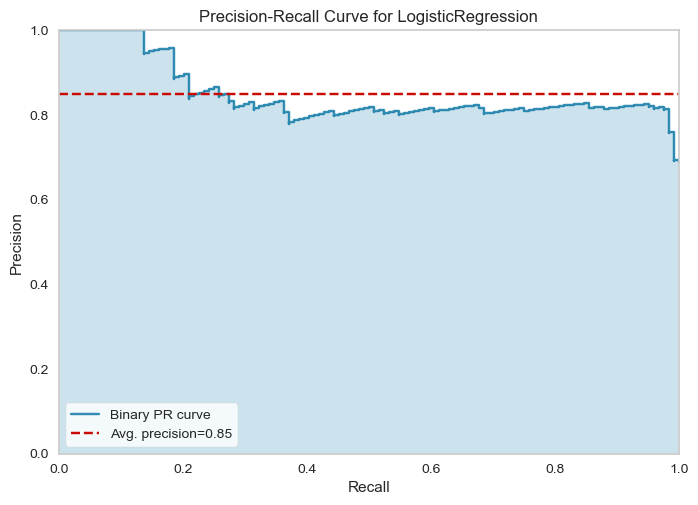

In [73]:
plot_model(tuned_model, plot = 'pr')


In [89]:
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Predicted
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Approved
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Approved
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Approved
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Approved
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Approved
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Approved
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Approved
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Denied


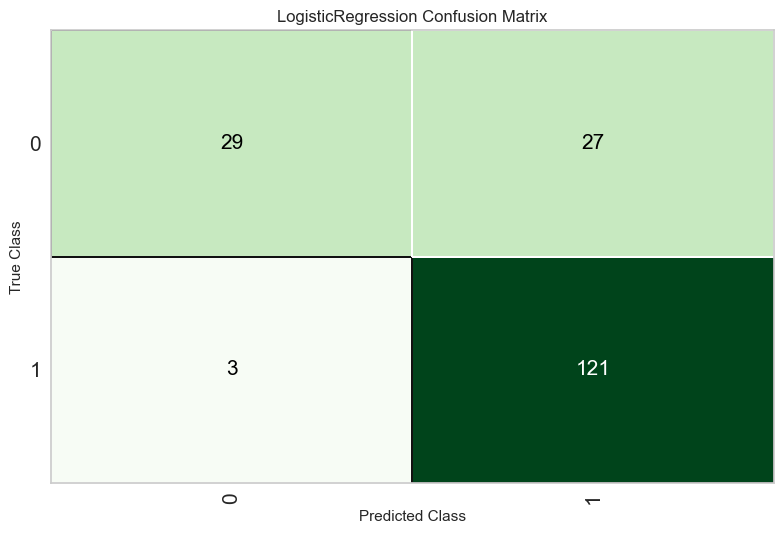

In [74]:
plot_model(tuned_model, plot = 'confusion_matrix')


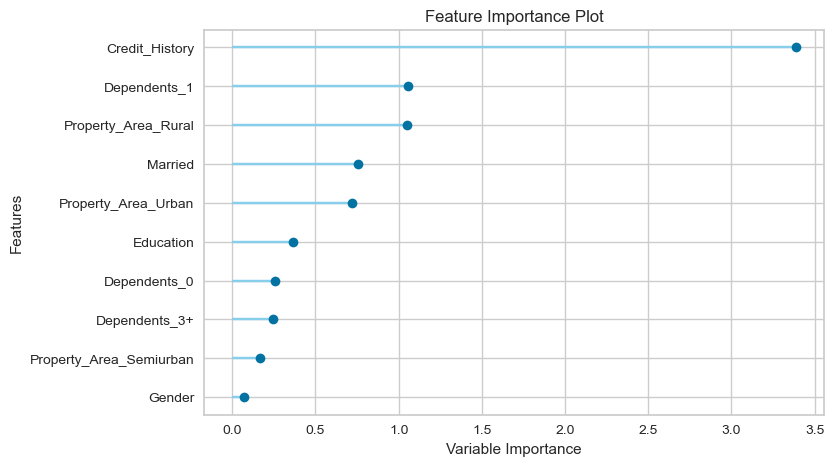

In [75]:
plot_model(tuned_model, plot = 'feature')


In [76]:
final_lr = finalize_model(tuned_model)
save_model(final_lr, 'final_lr_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'Married', 'Education',
                                              'Self_Employed', 'Total_Income',
                                              'LoanAmount', 'Loan_Amount_Term',
                                              'Credit_History', 'Dependents_0',
                                              'Dependents_1'...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('actual_estimator',
                  LogisticRegression(C=3.301, class_weight={}, dual=False,
                

In [77]:
evaluate_model(final_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [78]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [79]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_Predicted
0,0,5720,0,110.0,360.0,1.0,1
1,1,3076,1500,126.0,360.0,1.0,1
2,2,5000,1800,208.0,360.0,1.0,1
3,2,2340,2546,100.0,360.0,NaN,1
4,0,3276,0,78.0,360.0,1.0,1
...,...,...,...,...,...,...,...
362,3+,4009,1777,113.0,360.0,1.0,1
363,0,4158,709,115.0,360.0,1.0,1
364,0,3250,1993,126.0,360.0,NaN,1
365,0,5000,2393,158.0,360.0,1.0,0


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load data
data = pd.read_csv('./predictions.csv')
df = pd.read_csv('./predictions.csv')
# Separate features and target
X = data.drop('Loan_Status_Predicted', axis=1)
y = data['Loan_Status_Predicted']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categorical_transformer, X.select_dtypes(include=['object', 'bool']).columns)])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
y_train = y_train.to_numpy().astype('float32')
y_test = y_test.to_numpy().astype('float32')


In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [82]:
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are already defined and are in the sparse format
# Split the training data again to create a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now, convert only the validation set to dense format (if needed)
X_val = X_val.toarray()

# Train the model using the validation_data parameter
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
8/8 [==============================] - 2s 44ms/step - loss: 0.6036 - accuracy: 0.7521 - val_loss: 0.4624 - val_accuracy: 0.8644
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 0.4863 - accuracy: 0.7607 - val_loss: 0.3640 - val_accuracy: 0.8644
Epoch 3/10
8/8 [==============================] - 0s 11ms/step - loss: 0.4083 - accuracy: 0.7650 - val_loss: 0.2876 - val_accuracy: 0.8983
Epoch 4/10
8/8 [==============================] - 0s 10ms/step - loss: 0.3458 - accuracy: 0.8504 - val_loss: 0.2417 - val_accuracy: 0.9661
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 0.2865 - accuracy: 0.9231 - val_loss: 0.2092 - val_accuracy: 0.9661
Epoch 6/10
8/8 [==============================] - 0s 10ms/step - loss: 0.2363 - accuracy: 0.9316 - val_loss: 0.1821 - val_accuracy: 0.9661
Epoch 7/10
8/8 [==============================] - 0s 10ms/step - loss: 0.2007 - accuracy: 0.9359 - val_loss: 0.1723 - val_accuracy: 0.9661
Epoch 8/10
8/8 [=============

In [83]:
# First, import necessary libraries
import streamlit as st
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import load_model
import joblib

# Define a function to preprocess and train the model
def preprocess_and_train():
    # Load your data
    df = pd.read_csv('./predictions.csv')
    
    # Convert '3+' in 'Dependents' column to 3
    df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)
    
    # Separate features and target variable
    X = df.drop(['Loan_ID', 'Loan_Status_Predicted'], axis=1)
    y = df['Loan_Status_Predicted']
    
    # Define numerical and categorical columns
    numerical_cols = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
    categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
    
    # Preprocessing for numerical data
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    
    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    # Bundle preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)])
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Apply preprocessing
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    # Define and train your model here (This part is omitted for brevity)
    # model = define_your_model()  # You need to define your model architecture here
    # model.fit(X_train_processed, y_train, ...)
    
    # Save the trained model and preprocessor
    model.save('test.h5')
    joblib.dump(preprocessor, 'preprocessor.joblib')  # You need to import joblib
    
    return preprocessor, model

# Call the function to preprocess data and train the model
preprocessor, model = preprocess_and_train()

# Start the Streamlit app
st.title('Loan Approval Prediction')

# Assuming the preprocessor and model are ready
model = load_model('test.h5')  

# Streamlit UI for predictions
# Define user inputs (ensure to match these with your actual features)
feature_1 = st.number_input('ApplicantIncome', value=0.0)
feature_2 = st.number_input('CoapplicantIncome', value=0.0)
# Add more inputs as needed, corresponding to your features

# Predict button
if st.button('Predict'):
    # Create a data array from the inputs
    input_data = np.array([[feature_1, feature_2, ...]])  # Fill in all features
    # Preprocess input data
    input_data_processed = preprocessor.transform(input_data)
    
    # Make prediction
    prediction = model.predict(input_data_processed)
    
    # Display prediction
    if prediction[0] > 0.5:
        st.write('Loan is likely to be approved.')
    else:
        st.write('Loan is likely not to be approved.')


In [84]:
# Streamlit application for Loan Approval Prediction

import streamlit as st
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import joblib

# Assuming model and preprocessor are already trained and saved
model_path = 'test.h5'
preprocessor_path = 'preprocessor.joblib'

# Load the trained model and preprocessor
model = load_model(model_path)
preprocessor = joblib.load(preprocessor_path)

# Start the Streamlit app
st.title('Loan Approval Prediction')

# Example: Define user inputs for all necessary features
# This is a simplified example. You need to adapt it to your dataset.
feature_1 = st.number_input('ApplicantIncome', value=0.0)
feature_2 = st.number_input('CoapplicantIncome', value=0.0)
# Add inputs for all other features...

# Collect inputs into a DataFrame (ensure order matches training data)
input_df = pd.DataFrame([[feature_1, feature_2, ...]], columns=['ApplicantIncome', 'CoapplicantIncome', ...])

# Predict button
if st.button('Predict'):
    # Preprocess input data
    input_processed = preprocessor.transform(input_df)
    
    # Make prediction
    prediction = model.predict(input_processed)
    
    # Display prediction
    if prediction[0] > 0.5:
        st.write('Loan is likely to be approved.')
    else:
        st.write('Loan is likely not to be approved.')


In [85]:
import streamlit as st
import numpy as np
import joblib

# Load the trained model
model = joblib.load('loan_approval_model.joblib')

# Streamlit app for loan approval prediction
st.title('Loan Approval Prediction App')

# Assuming we have 20 features
input_features = []
for i in range(20):
    input_features.append(st.number_input(f'Feature {i+1}', value=0.0))

input_array = np.array(input_features).reshape(1, -20) 

if st.button('Predict'):
    prediction = model.predict(input_array)
    if prediction[0] == 1:
        st.write('Loan is likely to be approved.')
    else:
        st.write('Loan is likely not to be approved.')


In [86]:
import matplotlib.pyplot as plt

# Feature importance
if st.button('Show Feature Importance'):
    importance = model.coef_[0]
    indices = np.argsort(importance)
    features = df.columns[:-1]
    plt.figure(figsize=(10, 8))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importance[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    st.pyplot(plt)


In [87]:
import streamlit as st
import numpy as np
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('test.h5')

# Streamlit app for predictions
st.title('Model Prediction Interface')

input_data = np.array([[st.number_input('Feature 1'), st.number_input('Feature 2')]])  # Extend as needed
if st.button('Predict'):
    prediction = model.predict(input_data)
    st.write('Prediction:', prediction)


In [88]:
import streamlit as st
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# Load preprocessor and model
preprocessor = joblib.load('preprocessor.joblib')
model = load_model('test.h5')

st.title('Loan Approval Prediction')

applicant_income = st.number_input('Applicant Income', value=0)
coapplicant_income = st.number_input('Coapplicant Income', value=0)
# Add inputs for other features

# On button click
if st.button('Predict Loan Status'):
    # Create input array
    input_data = np.array([[applicant_income, coapplicant_income, ...]])  # Add other feature inputs here
    input_data_transformed = preprocessor.transform(input_data)
    
    # Make prediction
    prediction = model.predict(input_data_transformed)
    
    # Display the prediction
    if prediction[0] > 0.5:
        st.write('Loan is likely to be approved.')
    else:
        st.write('Loan is likely not to be approved.')
# Replace 'Loan_Status_Predicted' 1 with 'Approved' and 0 with 'Denied'
df['Loan_Status_Predicted'] = df['Loan_Status_Predicted'].replace({1: 'Approved', 0: 'Denied'})

# View the modified DataFrame
print(df[['Loan_ID', 'Loan_Status_Predicted']])

      Loan_ID Loan_Status_Predicted
0    LP001015              Approved
1    LP001022              Approved
2    LP001031              Approved
3    LP001035              Approved
4    LP001051              Approved
..        ...                   ...
362  LP002971              Approved
363  LP002975              Approved
364  LP002980              Approved
365  LP002986                Denied
366  LP002989              Approved

[367 rows x 2 columns]
